# AI4GSD Demo for grain size extraction from drone video
------------------------------------------
## Drone Video
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Import required packages
#### 2. Define working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI for validation purpuse
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data

### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

In [2]:
### 1. Import required packages

In [3]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

In [4]:
### 2. Define working directory

In [5]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250627_LR_WalkingPhotoFieldTest'                           # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername        

In [6]:
### 3. Extracting or copying your videos/photos to desired folder

In [7]:
AI4GSD.getPhotos(PhotoDir,nframe=500, overwrite=False)                     # Use once.

Cuts photos output folder: D:\Github\AI4GSD\Demo_Data\20250627_LR_WalkingPhotoFieldTest\
Video photo output folder: D:\Github\AI4GSD\Demo_Data\20250627_LR_WalkingPhotoFieldTest
Cutting IMG_7918.MOV: to size 1280(w) * 1280(h) every 500 frames.

Computation done, elapsed time 0.33 seconds.




In [8]:
### 4. Obtaining scales from AI for validation purpuse

In [9]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                    # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'AI'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20250627_LR_WalkingPhotoFieldTest
1/6: video 1/1, IMG_7918.MOV (100.00%), 0.36 s
Estimating photo resolution via local AI model: YOLO11m.1280.20250825
Model layer: 113, model parmeter: 20.06M, submodule number: 409
2/6: photo 1/5, IMG_7897.JPG, scale redbluecap, res 0.16 mm/px, status 200, (20.00%), 9.81 s
3/6: photo 2/5, IMG_7900.JPG, scale redbluecap, res 0.16 mm/px, status 200, (40.00%), 3.57 s
4/6: photo 3/5, IMG_7908.JPG, scale redbluecap, res 0.15 mm/px, status 200, (60.00%), 3.72 s
5/6: photo 4/5, IMG_7914.JPG, scale redbluecap, res 0.16 mm/px, status 200, (80.00%), 3.73 s
6/6: photo 5/5, IMG_7919.JPG, scale redbluecap, res 0.26 mm/px, status 200, (100.00%), 3.72 s
Total time: 32.63 s, time per photo/video 5.44 s
-----------------------------------------------------------------



In [10]:
### 5. Obtaining segmentation of anthropogenic objects

In [11]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName =['people','road','steel']                        # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20250627_LR_WalkingPhotoFieldTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 5, number of exluded photos 0
20250627_LR_WalkingPhotoFieldTest: 1/5: IMG_7897.JPG (20.00%)
20250627_LR_WalkingPhotoFieldTest: 2/5: IMG_7900.JPG (40.00%)
20250627_LR_WalkingPhotoFieldTest: 3/5: IMG_7908.JPG (60.00%)
20250627_LR_WalkingPhotoFieldTest: 4/5: IMG_7914.JPG (80.00%)
20250627_LR_WalkingPhotoFieldTest: 5/5: IMG_7919.JPG (100.00%)
Total time: 15.03 s, time per photo 3.01 s
-----------------------------------------------------------------



In [12]:
### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250627_LR_WalkingPhotoFieldTest
Output folder: 20250627_LR_WalkingPhotoFieldTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 5, number of exluded photos 0
1/5: IMG_7897.JPG, resolution 0.16 mm/px (20.00%), 0.00 s
Detected 28 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.00, 2.28, 2.63, and 5.77 cm
Detected 28 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.90, 10.18, 12.03, and 16.40 cm


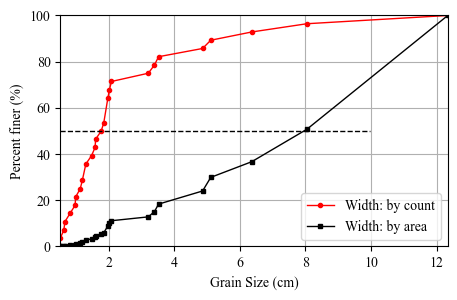

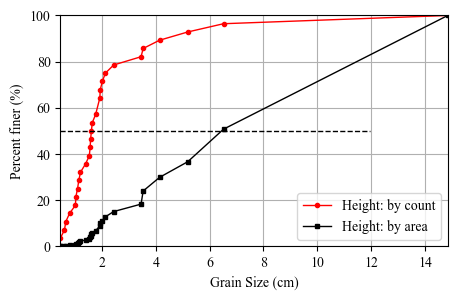

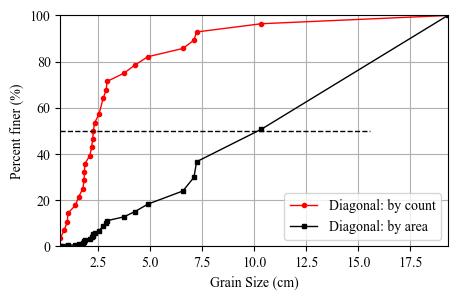

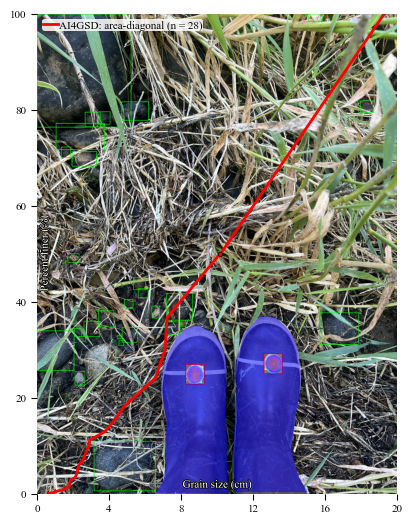

2/5: IMG_7900.JPG, resolution 0.16 mm/px (40.00%), 15.30 s
Detected 154 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.04, 2.54, 3.34, and 6.00 cm
Detected 154 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.41, 9.35, 10.12, and 12.91 cm


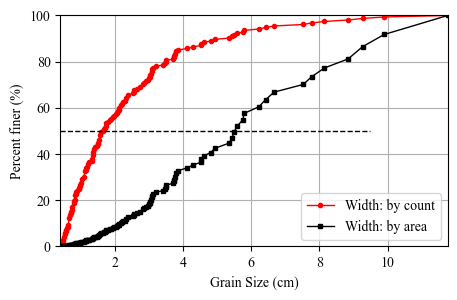

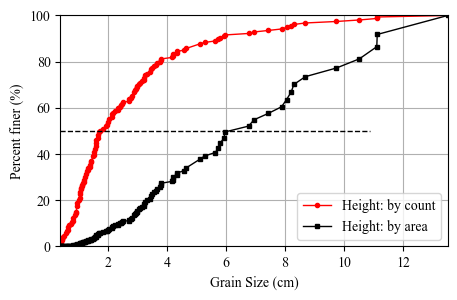

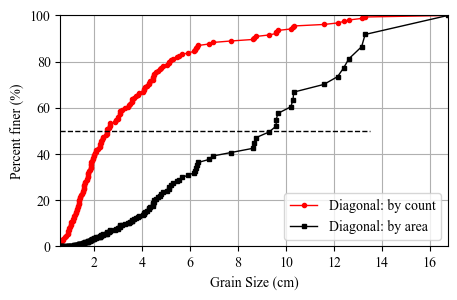

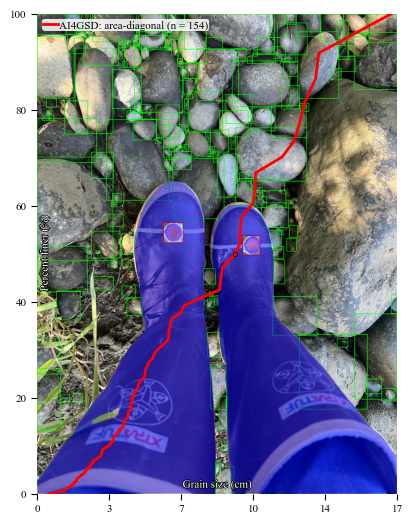

3/5: IMG_7908.JPG, resolution 0.15 mm/px (60.00%), 15.55 s
Detected 179 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.17, 2.40, 2.87, and 4.94 cm
Detected 179 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.17, 9.92, 11.94, and 19.67 cm


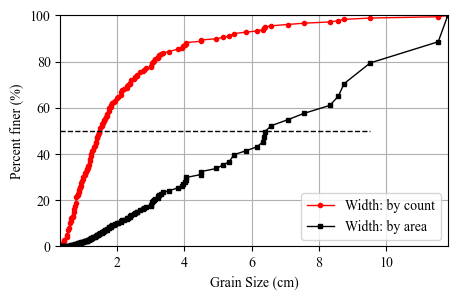

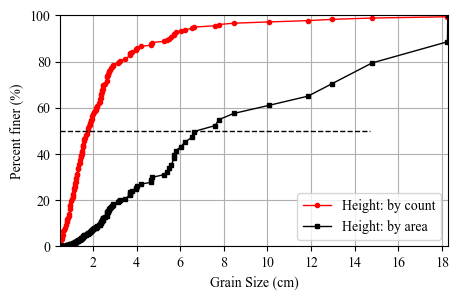

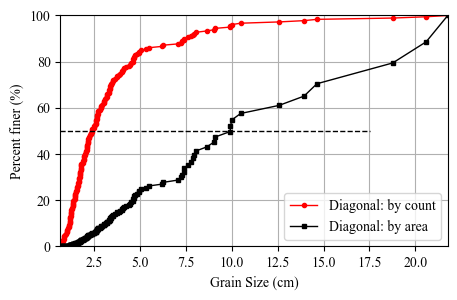

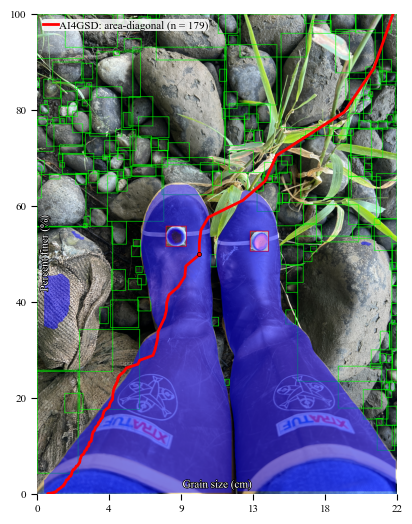

4/5: IMG_7914.JPG, resolution 0.16 mm/px (80.00%), 15.00 s
Detected 252 rocks, diagonal and count based D10, D50, D60, and D84 are: 0.83, 1.67, 2.08, and 3.79 cm
Detected 252 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.09, 6.25, 8.12, and 12.46 cm


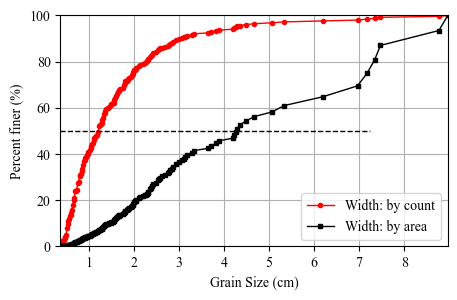

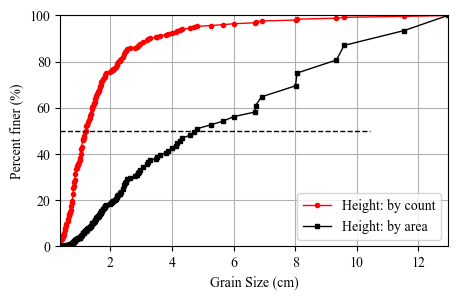

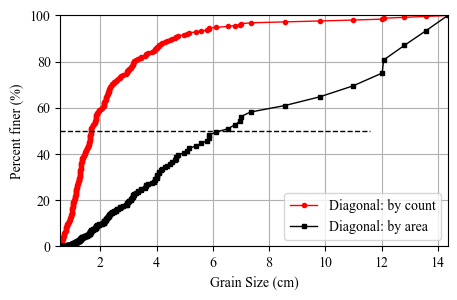

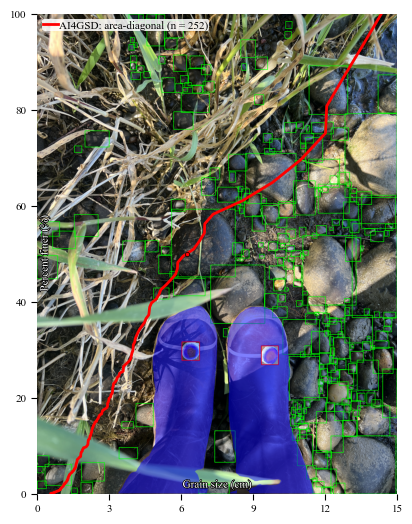

5/5: IMG_7919.JPG, resolution 0.26 mm/px (100.00%), 15.74 s


In [ ]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.ImageSizeFactor = 1
PP.LineThickness = 2
PP.YOLOSave = False
PP.SaveOverlayLabel = False
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True  
PP.MaximumGrainSize = 0.2
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)